In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load data

In [2]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

### Display first few rows of each dataset

In [3]:
print("Customers:")
print(customers.head())
print("\nProducts:")
print(products.head())
print("\nTransactions:")
print(transactions.head())

Customers:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024

## Data cleaning and Preprocessing

### Check for missing values

In [4]:
print("Customers:")
print("Customers:", customers.isnull().sum())
print("\nProducts:")
print("Products:", products.isnull().sum())
print("\nTransactions:")
print("Transactions:", transactions.isnull().sum())

Customers:
Customers: CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Products:
Products: ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Transactions:
Transactions: TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


### Check data types

In [5]:
print("Customers:")
print(customers.dtypes)
print("\nProducts:")
print(products.dtypes)
print("\nTransactions:")
print(transactions.dtypes)

Customers:
CustomerID      object
CustomerName    object
Region          object
SignupDate      object
dtype: object

Products:
ProductID       object
ProductName     object
Category        object
Price          float64
dtype: object

Transactions:
TransactionID       object
CustomerID          object
ProductID           object
TransactionDate     object
Quantity             int64
TotalValue         float64
Price              float64
dtype: object


### Convert datetime columns to datetime type

In [6]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [7]:
print(transactions.dtypes)

TransactionID              object
CustomerID                 object
ProductID                  object
TransactionDate    datetime64[ns]
Quantity                    int64
TotalValue                float64
Price                     float64
dtype: object


In [8]:
print(customers.dtypes)

CustomerID              object
CustomerName            object
Region                  object
SignupDate      datetime64[ns]
dtype: object


### Descriptive Statistics

In [9]:
print("\nCustomers Summary:")
print(customers.describe(include='all'))


Customers Summary:
       CustomerID      CustomerName         Region           SignupDate
count         200               200            200                  200
unique        200               200              4                  NaN
top         C0001  Lawrence Carroll  South America                  NaN
freq            1                 1             59                  NaN
mean          NaN               NaN            NaN  2023-07-19 08:31:12
min           NaN               NaN            NaN  2022-01-22 00:00:00
25%           NaN               NaN            NaN  2022-09-26 12:00:00
50%           NaN               NaN            NaN  2023-08-31 12:00:00
75%           NaN               NaN            NaN  2024-04-12 12:00:00
max           NaN               NaN            NaN  2024-12-28 00:00:00


In [10]:
print("\nProducts Summary:")
print(products.describe(include='all'))


Products Summary:
       ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4         NaN
top         P001  ActiveWear Smartwatch    Books         NaN
freq           1                      4       26         NaN
mean         NaN                    NaN      NaN  267.551700
std          NaN                    NaN      NaN  143.219383
min          NaN                    NaN      NaN   16.080000
25%          NaN                    NaN      NaN  147.767500
50%          NaN                    NaN      NaN  292.875000
75%          NaN                    NaN      NaN  397.090000
max          NaN                    NaN      NaN  497.760000


In [11]:
print("\nTransactions Summary:")
print(transactions.describe())



Transactions Summary:
                     TransactionDate     Quantity   TotalValue       Price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000
std                              NaN     1.117981   493.144478   140.73639


### Most purchased product categories

In [12]:
merged_data = transactions.merge(products, on="ProductID")
category_counts = merged_data["Category"].value_counts()
print("\nMost Purchased Product Categories:")
print(category_counts)



Most Purchased Product Categories:
Category
Books          270
Electronics    254
Home Decor     248
Clothing       228
Name: count, dtype: int64


* Books is the most popular category,followed by Electronics

### Average transaction value by region

In [13]:
merged_data = merged_data.merge(customers, on="CustomerID")
avg_transaction_value = merged_data.groupby("Region")["TotalValue"].mean()
print("\nAverage Transaction Value per Region:")
print(avg_transaction_value)



Average Transaction Value per Region:
Region
Asia             697.591606
Europe           710.489872
North America    624.235246
South America    721.554474
Name: TotalValue, dtype: float64


* South America customers have the highest average transaction value

### Top customers by total spending

In [14]:
customer_spending = merged_data.groupby("CustomerID")["TotalValue"].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Customers by Total Spending:")
print(customer_spending)


Top 5 Customers by Total Spending:
CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
Name: TotalValue, dtype: float64


* Customers like C0141 and C0054 are top contributors to revenue. 
Special loyalty programs for these customers could boost retention.

### Trends in total transactions over time

In [15]:
merged_data["TransactionDate"] = pd.to_datetime(merged_data["TransactionDate"])
monthly_sales = merged_data.set_index("TransactionDate")["TotalValue"].resample("M").sum()
print("\nMonthly Sales Trend:")
print(monthly_sales)


Monthly Sales Trend:
TransactionDate
2023-12-31     3769.52
2024-01-31    66376.39
2024-02-29    51459.27
2024-03-31    47828.73
2024-04-30    57519.06
2024-05-31    64527.74
2024-06-30    48771.18
2024-07-31    71366.39
2024-08-31    63436.74
2024-09-30    70603.75
2024-10-31    47063.22
2024-11-30    38224.37
2024-12-31    59049.20
Freq: M, Name: TotalValue, dtype: float64


### Geographical distribution of customers

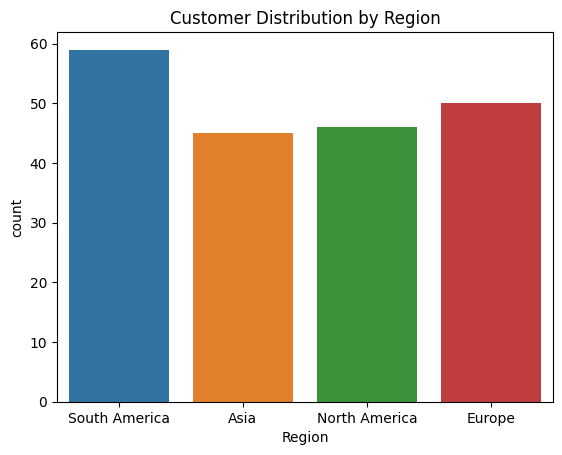

In [16]:
sns.countplot(data=customers,x= 'Region')
plt.title('Customer Distribution by Region')
plt.show()

### Customer Signup Trends

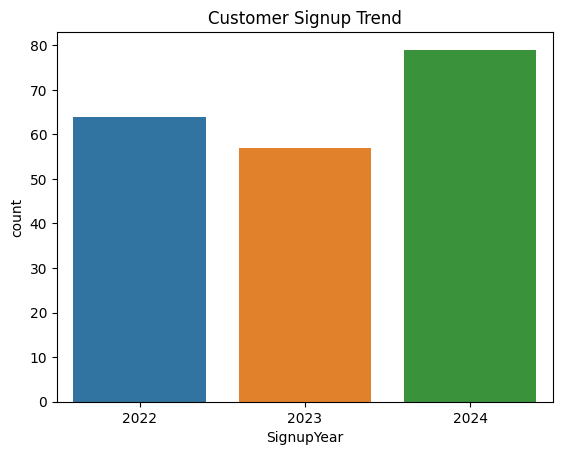

In [17]:
customers['SignupYear']= customers['SignupDate'].dt.year
sns.countplot(data=customers,x='SignupYear')
plt.title('Customer Signup Trend')
plt.show()

### Product category distribution

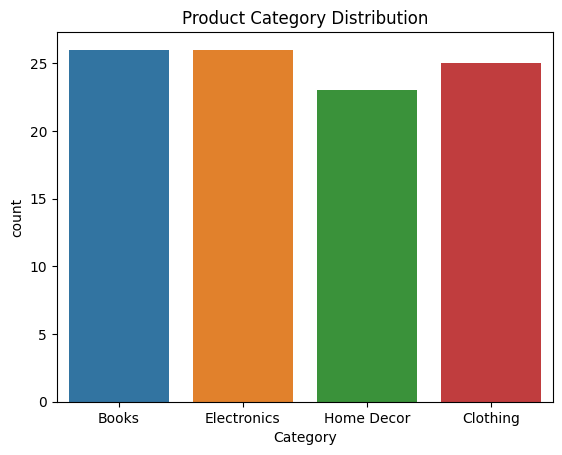

In [18]:
sns.countplot(data=products,x='Category')
plt.title('Product Category Distribution')
plt.show()

In [19]:
region_counts = customers['Region'].value_counts()
region_counts

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64

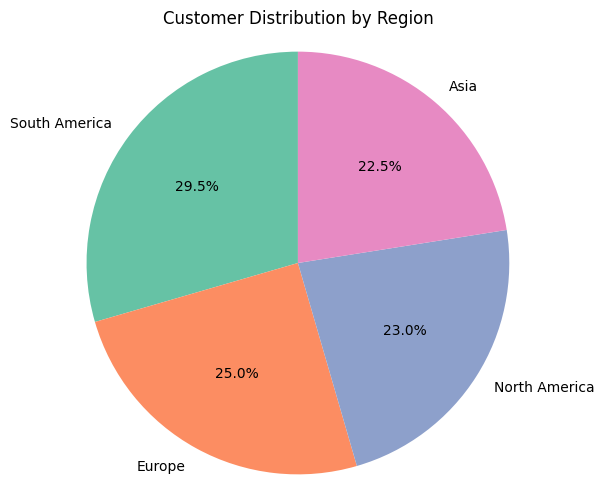

In [20]:
plt.figure(figsize=(6,6))
plt.pie(region_counts,labels=region_counts.index,autopct ='%1.1f%%',startangle=90,colors=sns.color_palette("Set2",len(region_counts)))
plt.title("Customer Distribution by Region")
plt.axis("equal")
plt.show()

### Visualize monthly sales

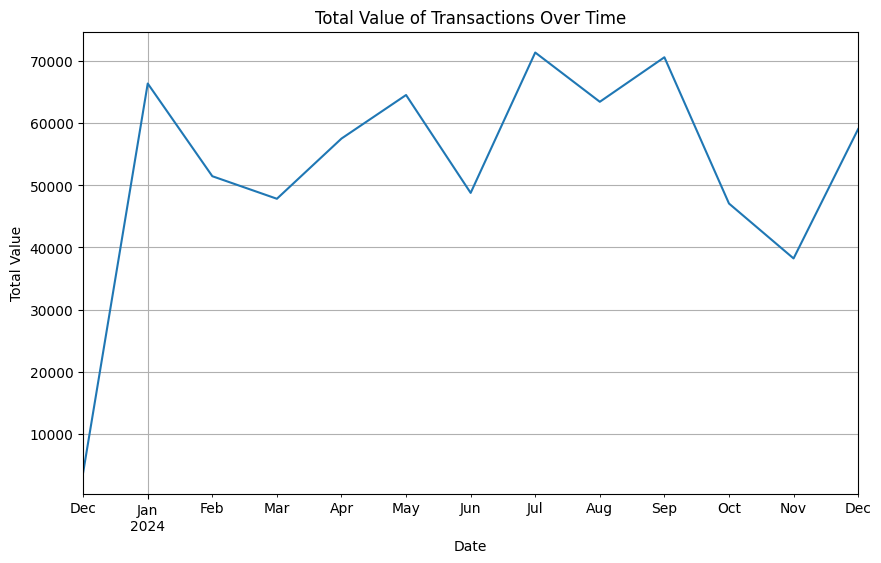

In [21]:
plt.figure(figsize=(10, 6))
monthly_sales.plot()
plt.title("Total Value of Transactions Over Time")
plt.xlabel("Date")
plt.ylabel("Total Value")
plt.grid()
plt.show()

* Line chart showing peaks in between Jul and Aug and dips in Nov.

## Popular product categories per region

In [22]:
popular_categories_region = merged_data.groupby(["Region", "Category"]).size().unstack().fillna(0)
print("\nPopular Product Categories per Region:")
print(popular_categories_region)


Popular Product Categories per Region:
Category       Books  Clothing  Electronics  Home Decor
Region                                                 
Asia              51        58           57          52
Europe            64        47           58          65
North America     65        60           60          59
South America     90        63           79          72


### Heatmap of popular categories per region

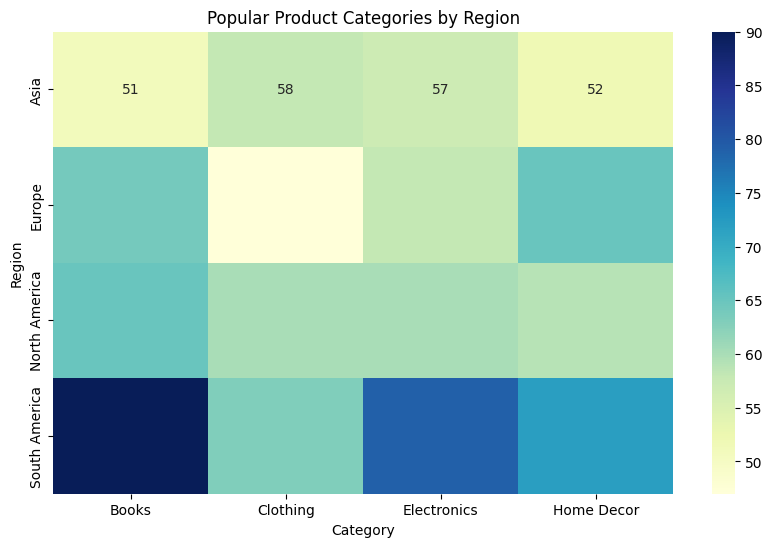

In [23]:
plt.figure(figsize=(10, 6))
sns.heatmap(popular_categories_region, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("Popular Product Categories by Region")
plt.xlabel("Category")
plt.ylabel("Region")
plt.show()


* Heatmap showing Books dominating in Asia, while Books is more popular in South America

### Top 5 Customers by Total transaction Value

In [24]:
top_customers = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(5)
print(top_customers)

CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
Name: TotalValue, dtype: float64


###  Most purchased product categories

In [25]:
product_category_counts = transactions.merge(products, on="ProductID")["Category"].value_counts()
print("\nMost Purchased Product Categories:")
print(product_category_counts)


Most Purchased Product Categories:
Category
Books          270
Electronics    254
Home Decor     248
Clothing       228
Name: count, dtype: int64


###  Average transaction value per region

In [26]:
transactions_customers = transactions.merge(customers, on="CustomerID")
avg_transaction_value = transactions_customers.groupby("Region")["TotalValue"].mean()
print("\nAverage Transaction Value per Region:")
print(avg_transaction_value)



Average Transaction Value per Region:
Region
Asia             697.591606
Europe           710.489872
North America    624.235246
South America    721.554474
Name: TotalValue, dtype: float64


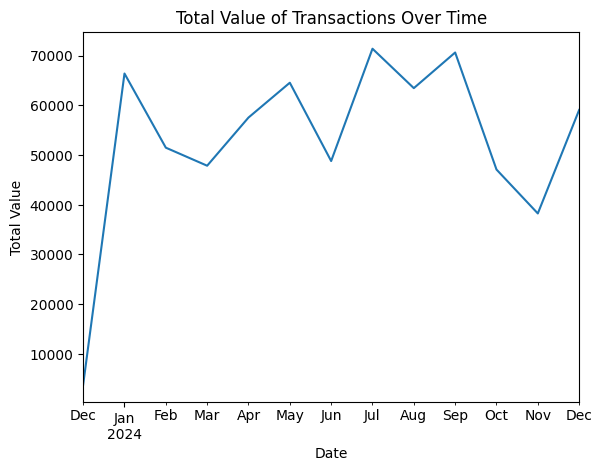

In [27]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions.set_index('TransactionDate')['TotalValue'].resample('M').sum().plot()
plt.title("Total Value of Transactions Over Time")
plt.xlabel("Date")
plt.ylabel("Total Value")
plt.show()